Total trainable parameters: 117
Epoch 0, Loss: 0.561637
Epoch 50000, Loss: 0.045577
Epoch 100000, Loss: 0.018538
Epoch 150000, Loss: 0.003594
Epoch 200000, Loss: 0.001107


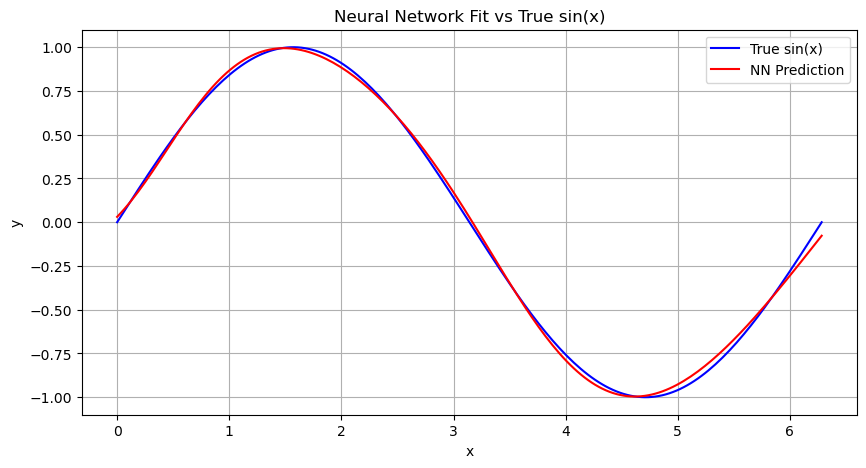

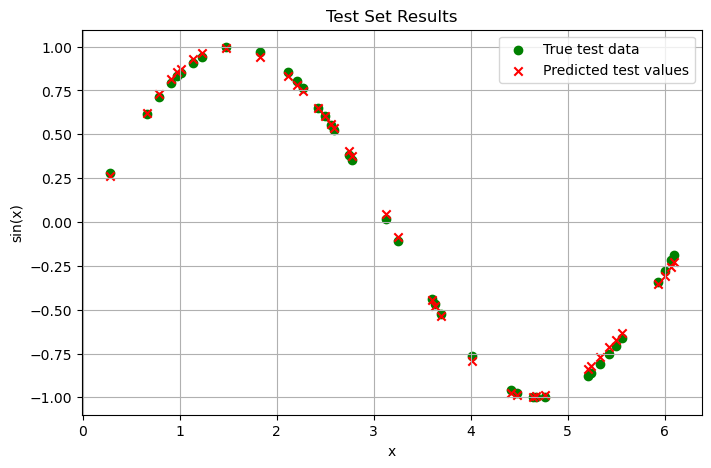

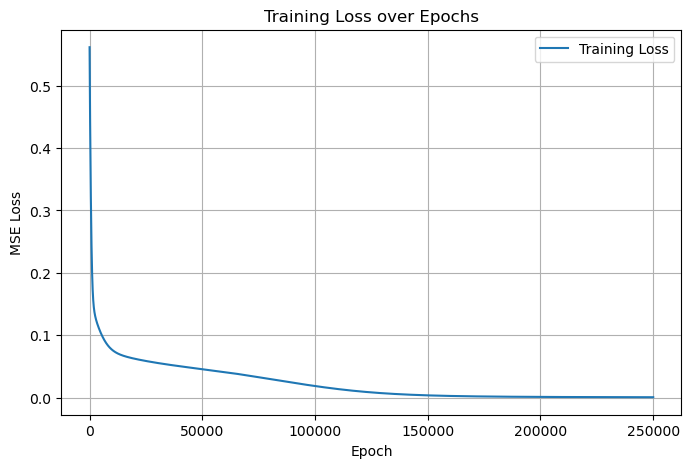

Test MSE: 0.000558


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ==== Data Preparation ====
# Task 1: Prepare another dataset of your interest
N = 200
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, N).reshape(-1, 1)
y = np.sin(x)

indices = np.arange(x.shape[0])
np.random.shuffle(indices)
train_size = int(0.8 * len(x))
train_idx, test_idx = indices[:train_size], indices[train_size:]
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# ==== Activation Functions ====
# Task 2: Implement another activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(z):
    s = sigmoid(z)
    return s * (1 - s)

# ==== Loss Function ====
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# ==== Neural Network Class ====
class NeuralNetwork:
    def __init__(self, layer_sizes, lr=0.01):
        self.lr = lr
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes) - 1
        self.W = []
        self.b = []
        self.loss_history = []

        for i in range(self.num_layers):
            w = np.random.randn(layer_sizes[i], layer_sizes[i + 1])
            b = np.zeros((1, layer_sizes[i + 1]))
            self.W.append(w)
            self.b.append(b)

        # Count and print total trainable parameters
        total_params = self.count_parameters()
        print(f"Total trainable parameters: {total_params}")

    def count_parameters(self):
        total = 0
        for w, b in zip(self.W, self.b):
            total += w.size + b.size
        return total

    def forward(self, x):
        z_list = []
        a_list = [x]

        for i in range(self.num_layers - 1):  # hidden layers
            z = np.dot(a_list[-1], self.W[i]) + self.b[i]
            a = sigmoid(z)
            z_list.append(z)
            a_list.append(a)

        z = np.dot(a_list[-1], self.W[-1]) + self.b[-1]  # output layer
        a_list.append(z)
        z_list.append(z)
        return a_list, z_list

    def backward(self, x, y, a_list, z_list):
        grads_W = [0] * self.num_layers
        grads_b = [0] * self.num_layers
        m = x.shape[0]

        dz = (a_list[-1] - y)
        grads_W[-1] = np.dot(a_list[-2].T, dz) / m
        grads_b[-1] = np.sum(dz, axis=0, keepdims=True) / m

        for i in reversed(range(self.num_layers - 1)):
            da = np.dot(dz, self.W[i + 1].T)
            dz = da * sigmoid_deriv(z_list[i])
            grads_W[i] = np.dot(a_list[i].T, dz) / m
            grads_b[i] = np.sum(dz, axis=0, keepdims=True) / m

        return grads_W, grads_b

    def update_params(self, grads_W, grads_b):
        for i in range(self.num_layers):
            self.W[i] -= self.lr * grads_W[i]
            self.b[i] -= self.lr * grads_b[i]

    def train(self, x_train, y_train, epochs=1000, verbose=True): 
        for epoch in range(epochs):
            a_list, z_list = self.forward(x_train)
            loss = mse(y_train, a_list[-1])
            self.loss_history.append(loss)

            grads_W, grads_b = self.backward(x_train, y_train, a_list, z_list)
            self.update_params(grads_W, grads_b)

            if verbose and epoch % 50000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")

    def predict(self, x_input):
        a_list, _ = self.forward(x_input)
        return a_list[-1]

    def plot_loss(self):
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label='Training Loss')
        plt.xlabel("Epoch")
        plt.ylabel("MSE Loss")
        plt.title("Training Loss over Epochs")
        plt.grid(True)
        plt.legend()
        plt.show()

# ==== Define and Train Neural Network ====
nn = NeuralNetwork(layer_sizes=[1, 10, 8, 1], lr=0.01) # Task 3: Modify the number of layers and neurons in each layer, learning rate, and total number of epochs
nn.train(x_train, y_train, epochs=250000) # Task 4: Modify the number of epochs

# ==== Predictions ====
y_pred_all = nn.predict(x)
y_pred_test = nn.predict(x_test)

# ==== Visualization Functions ====
def plot_all_predictions(x_true, y_true, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(x_true, y_true, label='True sin(x)', color='blue')
    plt.plot(x_true, y_pred, label='NN Prediction', color='red')
    plt.title('Neural Network Fit vs True sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_test_results(x_test, y_test, y_test_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(x_test, y_test, color='green', label='True test data')
    plt.scatter(x_test, y_test_pred, color='red', label='Predicted test values', marker='x')
    plt.title('Test Set Results')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# ==== Run Visualizations ====
plot_all_predictions(x, y, y_pred_all)
plot_test_results(x_test, y_test, y_pred_test)
nn.plot_loss()
print(f"Test MSE: {mse(y_test, y_pred_test):.6f}")

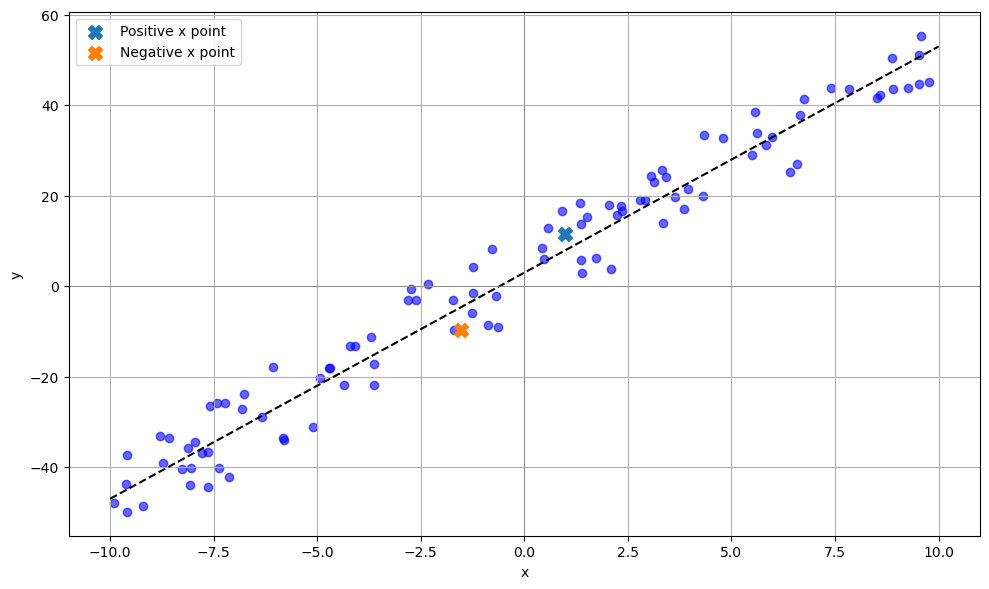

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate 100 random x values between -10 and 10
np.random.seed(0)
x_vals = np.random.uniform(-10, 10, 100)

# 2. Generate y values around the line y = 5x + 3 with some offset
noise = np.random.uniform(-10, 10, 100)  # random vertical offset
y_vals = 5 * x_vals + 3 + noise

# 3. Select two points: one with x > 0, one with x < 0
positive_idx = np.where(x_vals > 0)[0][0]
negative_idx = np.where(x_vals < 0)[0][0]
highlight_points = {
    "Positive x": (x_vals[positive_idx], y_vals[positive_idx]),
    "Negative x": (x_vals[negative_idx], y_vals[negative_idx])
}

# 4. Plot everything
plt.figure(figsize=(10, 6))

# Plot the reference line y = 5x + 3
x_line = np.linspace(-10, 10, 200)
y_line = 5 * x_line + 3
plt.plot(x_line, y_line, 'k--')

# Plot all the points
plt.scatter(x_vals, y_vals, color='blue', alpha=0.6)

# Highlight the selected points
for label, (x, y) in highlight_points.items():
    plt.scatter(x, y, s=100, label=f'{label} point', marker='X')

# Final plot settings
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
#plt.title('Random Points Above and Below y = 5x + 3')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()